In [1]:
import torch 
import matplotlib.pyplot as plt 

In [7]:
# Create a tensor 
x = torch.tensor(2.0, requires_grad=True)  # Set requires_grad to True allows you to take the derivative of the tensor. 
print(f"The tensor x is: {x}")  
print(f"X Grad is: {x.grad}")  # None, since not differentiated yet

The tensor x is: 2.0
X Grad is: None


In [8]:
# Create an equation y = x^2 
# y' = 2x 
y = x ** 2 
print(f"y=x^2 is: {y}") 

y=x^2 is: 4.0


In [9]:
# Call the .backward() function on a tensor to take the derivative 
y.backward() 
print(f"The derivative at x = 2: {x.grad}")  # x.grad is the first derivative

The derivative at x = 2: 4.0


In [11]:
# More complex function 
# y = x^2 + 2x + 1 
# y' = 2x + 2 

x = torch.tensor(2.0, requires_grad=True) 
y = x ** 2 + 2 * x + 1 
print(f"The equation y is: {y}") 

# Get the first derivative 
y.backward() 

# Print the result 
y_prime = x.grad 
print(f"The first derivative of y is: {y_prime}") 

The equation y is: 9.0
The first derivative of y is: 6.0


In [12]:
class SQ(torch.autograd.Function): 
    @staticmethod 
    def forward(ctx, i): 
        """ 
        In the forward pass, we receive a Tensor containing the input and return a Tensor containing the output. 
        `ctx` is a context object that can be used to stash information for backward computation. You can cache 
        arbitrary objects for use in the backward pass using `ctx.save_for_backward` method
        """
        result = i ** 2 
        ctx.save_for_backward(i) 
        return result 
    
    @staticmethod 
    def backward(ctx, grad_output): 
        """ 
        In the backward pass, we receive a Tensor containing the gradient of the loss with respect to the output, 
        and we need to compute the gradient of the loss with respect to the input 
        """
        i, = ctx.saved_tensors 
        grad_output = 2 * i 
        return grad_output 

In [14]:
# Applying it to the function 
# x = 2 
x = torch.tensor(2.0, requires_grad=True) 
sq = SQ.apply  

y = sq(x) 
print(y)

tensor(4., grad_fn=<SQBackward>)


In [15]:
print(y.grad_fn) 
y.backward() 
print(f"Derivative of x: {x.grad}")

Derivative of x: 4.0


In [16]:
# Partial Derivatives 
# Calculate f(u, v) = v * u + u^2 at u = 1, v = 2 
u = torch.tensor(1.0, requires_grad=True) 
v = torch.tensor(2.0, requires_grad=True) 
f = u * v + u ** 2 
print(f"The function f is: {f}")

The function f is: 3.0


In [17]:
# Calculate the derivative with respect to u
# f(u)' = v + 2u = 4
# f(v)' = u = 1  
f.backward() 
print(f"The partial derivative with respect to u: {u.grad}") 
print(f"The partial derivative with respect to v: {v.grad}")

The partial derivative with respect to u: 4.0
The partial derivative with respect to v: 1.0


In [22]:
# Calculate the derivative with respect to a function with multiple values as follows. Use the sum trick to produce a scalar valued function and then take the gradient 

# Calculate the derivative with multiple values 
x = torch.linspace(-10, 10, 10, requires_grad=True)
print(f"X is: {x}") 
Y = x ** 2 
print(f"Evaluating y: {Y}")
y = torch.sum(x**2)
print(f"After sum: {y}") 

X is: tensor([-10.0000,  -7.7778,  -5.5556,  -3.3333,  -1.1111,   1.1111,   3.3333,
          5.5556,   7.7778,  10.0000], requires_grad=True)
Evaluating y: tensor([100.0000,  60.4938,  30.8642,  11.1111,   1.2346,   1.2346,  11.1111,
         30.8642,  60.4938, 100.0000], grad_fn=<PowBackward0>)
After sum: 407.40740966796875


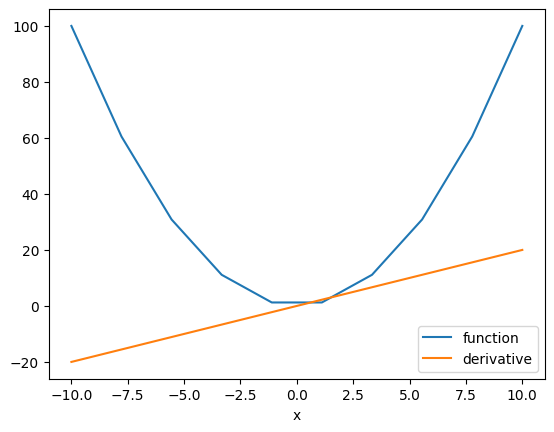

In [23]:
# Plot the function and its derivative 

# Take the derivative with respect to multiple value, and plot the function and its derivative 
y.backward() 

plt.plot(x.detach().numpy(), Y.detach().numpy(), label='function') 
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label='derivative')  # Detach creates a new tensor that shares the same data as the original but without gradient tracking
plt.xlabel('x') 
plt.legend()
plt.show()


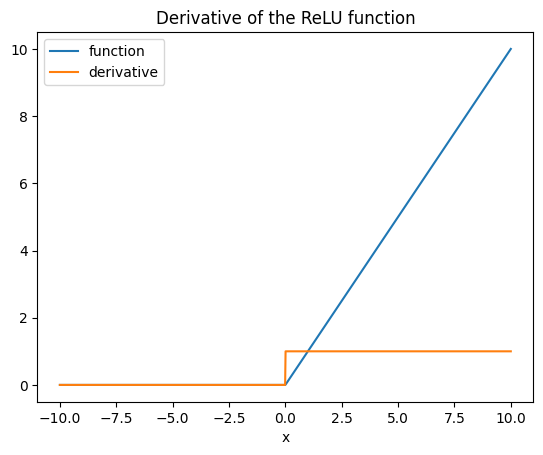

In [27]:
# Take the derivative of ReLU with respect to multiple values. Plot out the function and its derivative 
x = torch.linspace(-10, 10, 1000, requires_grad=True) 
Y = torch.relu(x) 
y = Y.sum() 
y.backward() 
plt.plot(x.detach().numpy(), Y.detach().numpy(), label='function') 
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label='derivative') 
plt.xlabel('x')
plt.legend()
plt.title('Derivative of the ReLU function') 
plt.show()